#**Craft Beer Analysis**

This analysis will be based on a dataset from [Kaggle](https://www.kaggle.com/nickhould/craft-cans). The files contain information of canned beers crafted by USA breweries. The data is from January 2017 from [CraftCans.com](http://web.archive.org/web/20140710173430/http://www.craftcans.com/db.php). The study will be carried using SQL and Python to understand and plot the data from both tables.

![alt text](https://www.arcgis.com/sharing/rest/content/items/cbe2b3319349402c8ea1e11ebeff1185/resources/1578316937202.jpeg?w=3117)

##**Introduction**

The craft beer market started to grown during the 1980's in the USA and it became more popular on the last decade, now reaching the whole globe. 

According to [Brewers Association](https://www.brewersassociation.org/statistics-and-data/national-beer-stats/), the market share of craft breweries reached 13.6% of US market. The retail market of craft beers has a value of US$ 29.3 billion in 2019. There are more than 8000 craft breweries in the US.

A craft brewery or microbrewery produces beer in smaller amounts than large company-owned brands. Craft beer usually focus on flavor, quality and technique. The proccess are based on traditional and handcrafted brewing from Europe. 

Beer are usually divided into three main types, lambics, ales and lagers. The difference depends on the fermentation proccess. Lambic beers have spontaneous fermentation. Ales usually use top-fermenting yeasts and ferment on higher temperatures (15.5-24.0°C/60-75°F) than lagers, which use bottom-fermenting yeasts at the temperatures around 10°C/50°F. There are four main schools of brewing: German, Belgian, British and American.

The German style usually produces larger beers and it is famous for the purity law of 1516. It requires only barley, hops and water in the production. Nowadays yeasts are also largelly used and other ingredients are used depending on the style and region (Kölsh, Rauch, Berliner, Munich Helles).

The Belgian school is famous for its strong and innovative beers, which uses spices and different fermentation techniques. Most famous styles are lambic, strong ale, witbier and trappist. The later are produced on Trappist monasteries and date back to 1830's.

The British beers are famous for their tradition and focus on the barley flavor. Most of the crafted beers are ales, such as pale ale, IPA, porter, stout and special bitter.

The American styles have roots in English beers, although it tends to use more hops, which give more aroma and bitternes (IBU), and they have increased value of alcohol by volume (ABV). Most famous types are american pale ale, New England IPA and american lager.

##**EDA**

The analysis will be caried on SQL language for the queries, graphs and tables will be plotted in Python. 

It is necessary to create the tables and import them to MySQL workbench. There are two tables, *beers* and *breweries*. The SQL analysis is executed on MySQL workbench and the results are copied to this notebook.

###What are the columns in each table?




The dataset were imported into MySQL workbench and the primary key columns were renamed and a column with the foreign key *breweries_id* was added to the *beers* table.

---
```
ALTER TABLE beers
RENAME COLUMN MyUnknownColumn TO entry;

ALTER TABLE beers
ADD PRIMARY KEY (entry);

ALTER TABLE beers
ADD FOREIGN KEY (brewery_id)
  REFERENCES breweries(brewery_id);
```
---
```
ALTER TABLE breweries
RENAME COLUMN id TO brewery_id;

ALTER TABLE breweries
ADD PRIMARY KEY (brewery_id);
```

In [56]:
#import python libraries

import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import numpy as np;

In [ ]:
#import all the csv files from the SQL queries

from google.colab import files
uploaded = files.upload()

In [3]:
#show beers table contents

beers_table = pd.read_csv("beers_table.csv")
beers_table.head(15)

,entry,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [4]:
#display columns` data type

display(beers_table.dtypes)

entry           int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

The columns *entry* and *brewery_id* are the table's primary and foreign keys, respectively.


![image.png](https://drive.google.com/uc?id=1whY1trhc9rGzprm4Ax1mho8hE8jxlVgt)


In [5]:
#show breweries table contents

breweries_table = pd.read_csv("breweries_table.csv")
breweries_table.head()

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [6]:
#display columns` data type

display(breweries_table.dtypes)

brewery_id     int64
name          object
city          object
state         object
dtype: object

The column *brewery_id* is the table's primary key.


![image.png](https://drive.google.com/uc?id=1z0_bSQdYdRrm8mKoSLqzGVl-3kAxH2Zm)

The database schema can be represented as below. It is possible to notice that the *beers* table has relationship with the *breweries* table's primary key *brewery_id*.

![alt text](https://drive.google.com/uc?id=1n9tJ0NMhQh4vgQRuldQTeGGeI92xkCNL)


###How many beers and breweries are listed?


The query `SELECT count(entry) FROM beers;` gives a total number of 2348 beers.

`SELECT count(brewery_id) FROM breweries;` shows there are a total of 558 breweries.



###Which beers have highest ABV, IBU and amount by volume?

Query and order beers with highest ABV:

```
SELECT entry, abv, name, style FROM beers 
ORDER BY abv DESC;
```


In [8]:
abv = pd.read_csv("abv.csv")
abv.head(10)

,entry,abv,name,style
0,2278,0.128,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad)
1,70,0.125,London Balling,English Barleywine
2,2189,0.120,Csar,Russian Imperial Stout
3,2279,0.104,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer
4,1857,0.100,4Beans,Baltic Porter
5,21,0.099,Lower De Boom,American Barleywine
6,267,0.099,Forest Fire Imperial Smoked Rye,Rye Beer
7,412,0.099,Wizard Burial Ground,Quadrupel (Quad)
8,437,0.099,Hubris Quadrupel Anniversary Ale,Quadrupel (Quad)
9,441,0.099,Vivant Belgian Style Imperial Stout (2012),Russian Imperial Stout


List the highest values of IBU:

```
SELECT entry, ibu, name, style FROM beers 
WHERE ibu > 0
ORDER BY ibu DESC;
```



In [9]:
ibu = pd.read_csv("ibu.csv")
ibu.head(10)

,entry,ibu,name,style
0,1788,99.0,Count Hopula (Vault Series),American Double / Imperial IPA
1,971,99.0,Hop A Potamus Double Dark Rye Pale Ale,Rye Beer
2,579,99.0,Terrace Hill Double IPA,American Double / Imperial IPA
3,2084,99.0,Furious,American IPA
4,1598,98.0,Ten Fidy,Russian Imperial Stout
5,1585,98.0,Ten Fidy Imperial Stout (2008),Russian Imperial Stout
6,1578,98.0,Ten Fidy Imperial Stout,Russian Imperial Stout
7,1586,98.0,Ten Fidy Imperial Stout (2007),Russian Imperial Stout
8,835,97.0,Vortex IPA,American IPA
9,2095,95.0,Dodgy Knight Imperial IPA,American Double / Imperial IPA


List the largest cans of the dataset:

```
SELECT ounces , count(ounces) AS number_by_volume FROM beers 
GROUP BY ounces
ORDER BY ounces DESC;
```


In [10]:
ounces = pd.read_csv("ounces.csv")
ounces

,ounces,number_by_volume
0,32.0,4
1,24.0,22
2,19.2,15
3,16.9,1
4,16.0,821
5,12.0,1484
6,8.4,1


The strogest beers have around 12% alcohol by volume. The most bitter beers have IBU of 99 and most of them are American Double/Imperial IPA style. Most canned beers are on 12 and 16 ounces cans, 1484 and 821 beers respectively.

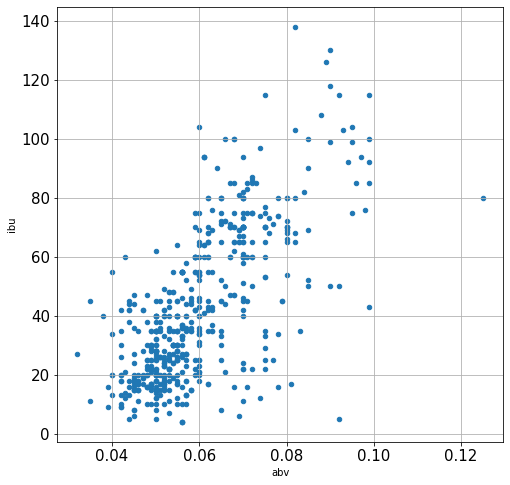

In [13]:
#plot the distribution of ABV x IBU

beers_table.plot(kind="scatter", x='abv', y='ibu', figsize=(8,8),fontsize=15, grid = True)

###How many styles of beer? Which ones are they?


```
SELECT DISTINCT style FROM beers;
SELECT count(DISTINCT style) FROM beers;
```

This query shows 100 distinct beer styles.



```
SELECT style, count(style) AS number_beer_by_style FROM beers 
GROUP BY style
ORDER BY number_beer_by_style DESC;
```


In [ ]:
styles = pd.read_csv("styles.csv")
styles.head(10)

,style,number_beer_by_style
0,American IPA,417
1,American Pale Ale (APA),239
2,American Amber / Red Ale,125
3,American Blonde Ale,104
4,American Double / Imperial IPA,103
5,American Pale Wheat Ale,95
6,American Brown Ale,68
7,American Porter,65
8,Saison / Farmhouse Ale,52
9,Witbier,49


The most commom styles are American IPA, APA, America Amber/Red Ale, American Blonde Ale and American Double/Imperial IPA.

This query shows the mean ABV and mean IBU for each style:
```
SELECT style, avg(abv*100) as mean_abv, avg(ibu) as mean_ibu, count(style) AS number_beer_by_style FROM beers 
GROUP BY style
ORDER BY number_beer_by_style DESC;
```



In [14]:
styles_ibu_abv = pd.read_csv("styles_ibu_abv.csv")
styles_ibu_abv.head(10)

,style,mean_abv,mean_ibu,number_beer_by_style
0,American IPA,6.452758,48.820144,417
1,American Pale Ale (APA),5.457741,28.769874,239
2,American Amber / Red Ale,5.745600,22.360000,125
3,American Blonde Ale,4.963462,12.307692,104
4,American Double / Imperial IPA,8.736893,67.951456,103
5,American Pale Wheat Ale,4.841053,13.284211,95
6,American Brown Ale,5.792647,16.705882,68
7,American Porter,5.960000,19.153846,65
8,Saison / Farmhouse Ale,6.144231,12.557692,52
9,Witbier,5.355102,7.938776,49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4165b5f470>],
      dtype=object)

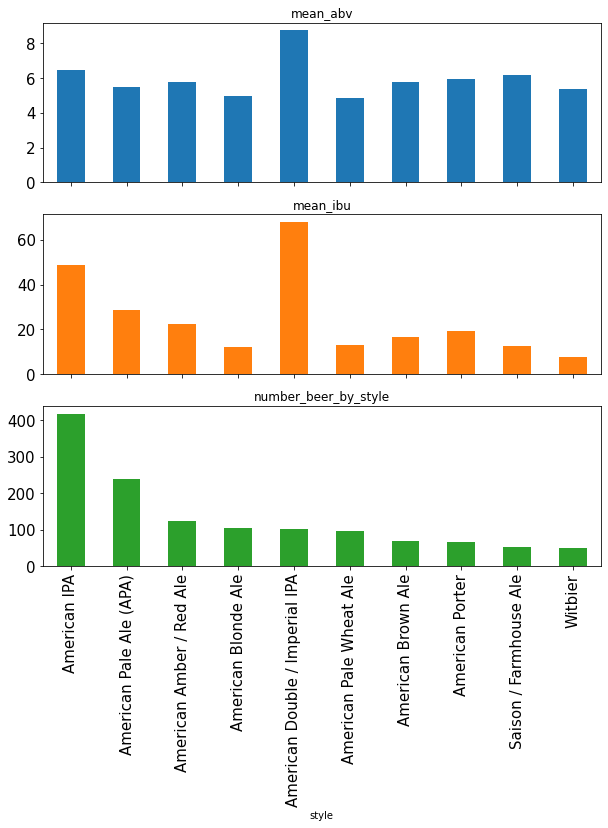

In [16]:
#plot the mean ABV, mean IBU and total number of beers of each style

top_styles = styles_ibu_abv.head(10)
styles_abv = top_styles[['style','mean_abv']]
styles_ibu = top_styles[['style','mean_ibu']]

top_styles.plot(kind='bar', figsize=(10,10), x='style',subplots=True, grid=False,layout=(3, 1), sharex=True, sharey=False, legend=False, fontsize=15)

It is noticible that America IPA style is the most popular style brewed it the USA, around 18% of the total number of beers belong to this style. The most bitter and strong style is American Double / Imperial IPA.

###How many beers can be classified as strong, regular or light?

Classification of beers by their ABV, which Very Strong Beer have more than 9% of alcohol by volume, Strong Beer have between 5% and 9%, Regular Beer have 2% to 5% and Light Beer are the ones with less than 2% ABV.

```
SELECT COUNT(*) AS total_by_classification, AVG(abv) AS mean_abv, 
CASE
	WHEN abv >= 0.09 THEN 'Very Strong Beer'
    WHEN abv >= 0.05 AND abv < 0.09 THEN 'Strong Beer'
    WHEN abv >= 0.02 AND abv < 0.05 THEN 'Regular Beer'
    ELSE 'Light Beer'
END AS classification
FROM beers
GROUP BY classification
ORDER BY total_by_classification DESC;
```



In [17]:
classification = pd.read_csv("classification.csv")
classification

,total_by_classification,mean_abv,classification
0,1779,0.061502,Strong Beer
1,460,0.044763,Regular Beer
2,108,0.095778,Very Strong Beer
3,1,0.001000,Light Beer


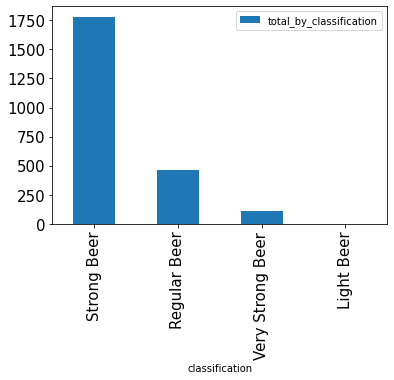

In [19]:
#plot the classification results

classification.plot(kind='bar',x='classification',y='total_by_classification', fontsize=15)

The query above shows that most produced beers have Strong Beer classification, at a number of 1779 total beers.

###What are the top 5 breweries in number of amount of different beers produced?



```
SELECT B.name, count(*) AS beers_per_brewery, A.brewery_id FROM beers A
INNER JOIN breweries B
ON A.brewery_id = B.brewery_id
GROUP BY B.name
ORDER BY count(*) DESC;
```



In [20]:
beers_per_brewery = pd.read_csv("beers_per_brewery.csv")
beers_per_brewery.head(10)

,name,beers_per_brewery,brewery_id
0,Brewery Vivant,60,10
1,Oskar Blues Brewery,42,166
2,Sun King Brewing Company,36,25
3,Cigar City Brewing Company,25,141
4,Sixpoint Craft Ales,24,46
5,Hopworks Urban Brewery,23,80
6,Stevens Point Brewery,22,131
7,Great Crescent Brewery,20,165
8,21st Amendment Brewery,20,368
9,SanTan Brewing Company,19,30


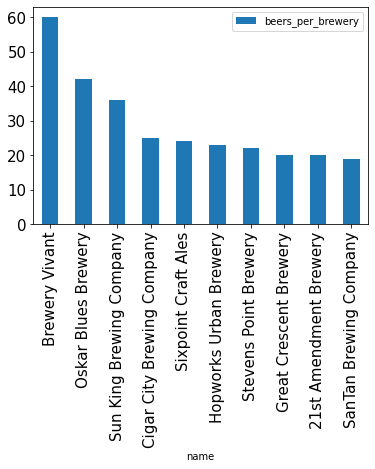

In [21]:
#plot the top breweries results

top_beers_brewery = beers_per_brewery.head(10)
top_beers_brewery.plot(kind='bar',x='name',y='beers_per_brewery', fontsize=15)

The query shows that the breweries that have most number of beers are Brewery Vivant, Oskar Blues Brewery, Sun King Brewery Company, Cigar City Brewery Company and Sixpoint Craft Ales.

###Which style is produced by most breweries?



```
SELECT  style, COUNT(DISTINCT brewery_id) AS unique_breweries_per_style FROM beers
GROUP BY style
ORDER BY unique_breweries_per_style DESC;
```


In [23]:
unique_breweries_per_style = pd.read_csv("unique_breweries_per_style.csv")
unique_breweries_per_style.head(10)

,style,unique_breweries_per_style
0,American IPA,290
1,American Pale Ale (APA),180
2,American Amber / Red Ale,105
3,American Blonde Ale,85
4,American Double / Imperial IPA,75
5,American Pale Wheat Ale,64
6,American Brown Ale,61
7,American Porter,59
8,Witbier,44
9,Fruit / Vegetable Beer,43


The style that most breweries produce is American IPA, there are 290 of the total 558 breweries which brew this style. The second style (APA) is behind with 180 different breweries producing it.

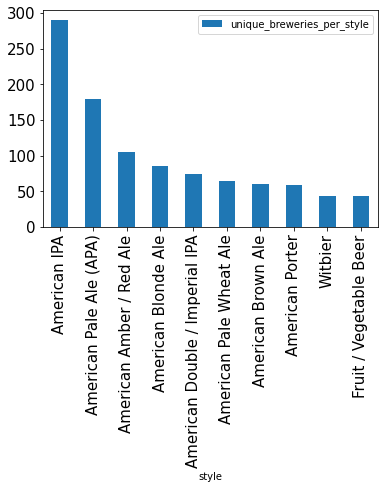

In [25]:
#plot unique brewery per style results

top_unique_breweries_per_style = unique_breweries_per_style.head(10)
top_unique_breweries_per_style.plot(kind='bar',x='style',y='unique_breweries_per_style', fontsize=15)

###Which states and cities have more breweries?



```
SELECT city, count(city) AS number_breweries_per_city FROM breweries 
GROUP BY city
ORDER BY number_breweries_per_city DESC;
```



In [ ]:
breweries_per_city = pd.read_csv("breweries_per_city.csv")
breweries_per_city.head(10)

,city,number_breweries_per_city
0,Portland,17
1,Boulder,9
2,Chicago,9
3,Seattle,9
4,San Diego,8
5,Denver,8
6,Austin,8
7,Bend,6
8,San Francisco,5
9,Indianapolis,4


Portland is the city that has more breweries, 17. It is almost twice as much as Boulder, Chicago and Seattle with 9 breweries each.



```
SELECT state, count(state) AS number_breweries_per_state FROM breweries 
GROUP BY state
ORDER BY number_breweries_per_state DESC;
```



In [48]:
breweries_per_state = pd.read_csv("breweries_per_state.csv")
breweries_per_state.head(20)

,state,number_breweries_per_state
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28
5,PA,25
6,MA,23
7,WA,23
8,IN,22
9,WI,20


Colorado, California, Michigan and Oregon are the states with more breweries, respectively 47, 39, 32 and 29.

In [27]:
#import csv with coordinates from each state

states = pd.read_csv("states.csv")
states.head()

,state,latitude,longitude,name,number_breweries_per_state
0,AK,63.588753,-154.493062,Alaska,7
1,AL,32.318231,-86.902298,Alabama,3
2,AR,35.201050,-91.831833,Arkansas,2
3,AZ,34.048928,-111.093731,Arizona,11
4,CA,36.778261,-119.417932,California,39


In [ ]:
#install and import geopandas

!pip install geopandas

In [39]:
import geopandas as gpd

In [30]:
#define dataframe with states locations and number of breweries

df = pd.read_csv("states.csv")

In [31]:
df.head()

,state,latitude,longitude,name,number_breweries_per_state
0,AK,63.588753,-154.493062,Alaska,7
1,AL,32.318231,-86.902298,Alabama,3
2,AR,35.201050,-91.831833,Arkansas,2
3,AZ,34.048928,-111.093731,Arizona,11
4,CA,36.778261,-119.417932,California,39


In [32]:
#create geodataframe to plot using geopandas

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,state,latitude,longitude,name,number_breweries_per_state,geometry
0,AK,63.588753,-154.493062,Alaska,7,POINT (-154.49306 63.58875)
1,AL,32.318231,-86.902298,Alabama,3,POINT (-86.90230 32.31823)
2,AR,35.201050,-91.831833,Arkansas,2,POINT (-91.83183 35.20105)
3,AZ,34.048928,-111.093731,Arizona,11,POINT (-111.09373 34.04893)
4,CA,36.778261,-119.417932,California,39,POINT (-119.41793 36.77826)


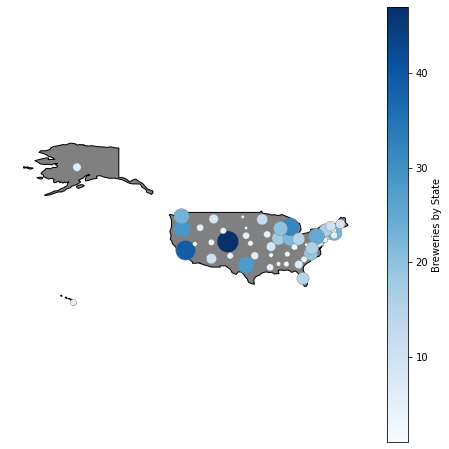

In [46]:
#mapping the results of number of breweries by state

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf['size'] = gdf['number_breweries_per_state']*10
ax = world[world.name == 'United States of America'].plot(color='grey', edgecolor='black', figsize=(8,8))
gdf.plot(ax=ax, column="number_breweries_per_state", cmap="Blues",edgecolor="grey", 
         linewidth=0.4, legend=True,legend_kwds={'label': "Breweries by State", 'orientation': "vertical"},markersize='size')
ax.axis("off")
plt.axis('equal')
plt.show()

It is clear that most breweries are located on the West Coast, Northeast, Michigan, Texas and Colorado.

###Which is the most produced style in each state?

Create a table joining both tables with state initials, styles names and number of different beers of each style in the state.

```
CREATE TABLE popular_beers_states
  AS SELECT B.state AS state_initials, a.style AS style_name , 
  COUNT(a.id) AS number_each_style FROM beers A
	INNER JOIN breweries B
	ON A.brewery_id = B.brewery_id
	GROUP BY b.state, a.style
	ORDER BY  b.state, number_each_style DESC;
```

Then, query this new table for the most produced style in each state.


```
SELECT A.state_initials, A.style_name, A.number_each_style
FROM popular_beers_states A
INNER JOIN (
    SELECT state_initials, MAX(number_each_style), number_each_style
    FROM popular_beers_states
    GROUP BY state_initials
) B ON A.state_initials = B.state_initials AND 
A.number_each_style = B.number_each_style;
```

In [54]:
most_produced = pd.read_csv("most_produced_by_state.csv")
most_produced.head(10)

,state_initials,style_name,number_each_style
0,AK,American IPA,7
1,AL,American IPA,2
2,AL,American Pale Ale (APA),2
3,AR,American Pilsner,1
4,AR,American Amber / Red Ale,1
5,AR,Oatmeal Stout,1
6,AR,Extra Special / Strong Bitter (ESB),1
7,AR,American Pale Ale (APA),1
8,AZ,American IPA,7
9,CA,American IPA,45


It is possible to notice that some states have more than one beer style as the most produced. As these states have a lower number of breweries, the analysis will be carried with the states with more than 5 diverse beers of the most popular style.

In [62]:
#show the list of the states with more the 5 diverse beers of the most popular style

df = most_produced.copy()
most_produced_5 = df[df['number_each_style'] > 5]
most_produced_5 = most_produced_5.sort_values('number_each_style', ascending=False)
most_produced_5

,state_initials,style_name,number_each_style
9,CA,American IPA,45
10,CO,American Pale Ale (APA),39
36,IN,American IPA,26
69,OR,American IPA,24
89,WA,American IPA,21
48,MI,American IPA,20
43,MA,American IPA,19
23,FL,American IPA,19
70,PA,American IPA,18
35,IL,American Pale Ale (APA),16


It is noticeable that most states have American Ales as their most popular style, except in Wisconsin, which the most produced style is American Adjunct Lager.

#**Conclusion**

This dataframe was useful to practice and use tools in SQL and Python. SQL comes in handy to query the data, organise results and visualise information. Python is a strong tool to plot and show results.

Craft beer market has been growing around the globe and it can become a interesting source of income for many small and amateur breweries. It is important to understand the market near your business, client's preferences and how the competition can affect your enterprise. 

The American market has many other players in states such as Colorado, California, Michigan and Oregon and the competition could become hard to start a new craft beer brand. Most of the breweries produce American style Ales (IPA, APA Double IPA). Perhaps brewing other styles of craft beers can a potential move to differentiate from other micro breweries. 

A further study should be carried to understand the market in such states and how can a new brewery can stand from competition, mainly by understanding the probable clients' preferences and demands.